# Statistical Forecasting
Vandeput, Nicolas. Data Science for Supply Chain Forecasting. De Gruyter. Kindle Edition. 

## Moving Average

### Moving Average Model
The moving average model is based on the idea that __future demand is similar to the recent demand we observed__. With this model, we simply assume that the forecast is the average demand during the last n periods. If you look at monthly demand, this could translate as: _“We predict the demand in June to be the average of March, April, and May.”_ If we formalize this idea, we obtain this formula: 
$$f_t = \frac{1}{n} \sum_{i=1}^{n} d_{t-i}$$

Where,  
 - $f_t$ is the forecast for period t
 - $n$ is the number of periods we take the average of
 - $d_t$ is the demand during period t




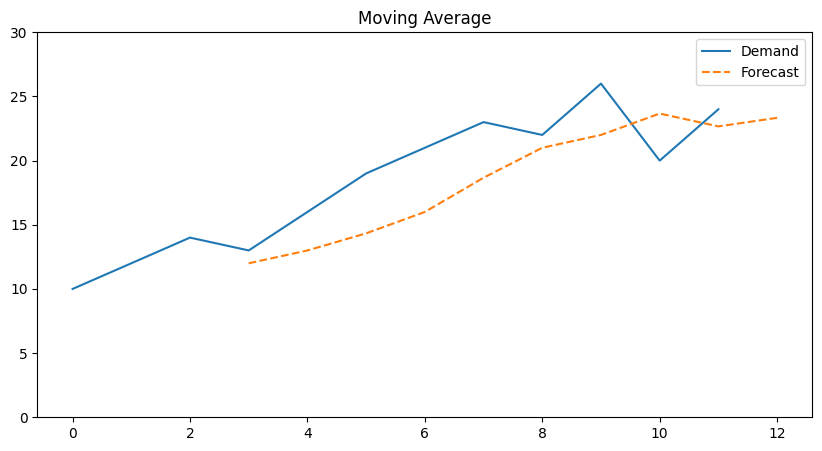

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def moving_average(demand, extra_periods=1, n=3):
    # Historical period length
    cols = len(demand)
    # Append np.nan into the demand array to cover future periods
    demand = np.append(demand, [np.nan]*extra_periods)
    # Create a forecast column full of np.nan
    forecast = np.full(cols+extra_periods, np.nan)
    # Calculate the forecast
    for t in range(n, demand.shape[0]):
        forecast[t] = np.mean(demand[t-n:t])
    df = pd.DataFrame.from_dict({"Demand": demand, "Forecast": forecast, 'Error': demand-forecast})
    return df

### Example
demand = np.array([10, 12, 14, 13, 16, 19, 21, 23, 22, 26, 20, 24])
df = moving_average(demand, extra_periods=4, n=3)
df[['Demand', 'Forecast']].plot(figsize = (10, 5), title = 'Moving Average', ylim = (0,30), style = ['-', '--'])
plt.show()

### Moving Average Limitations
There are three main limitations at the core of a moving average. 
1. __No Trend__ The model does not see any trend (and therefore won’t project any). 
2. __No Seasonality__ The model does not see any seasonality (and therefore won’t project any).
3. __Flat Historical Weighting__ The model gives the same weight to all historical periods. This means that the model will give the same importance to a period that is very far in the past as to a period that is very recent.


## Forecast Accuracy
The forecast accuracy is a measure of how well the forecast is doing. There are several ways to measure the forecast accuracy, but the most common are: 
1. __Mean Absolute Deviation (MAD)__ The mean absolute deviation is the average of the absolute errors.
2. __Mean Squared Error (MSE)__ The mean squared error is the average of the squared errors.
3. __Root Mean Squared Error (RMSE)__ The root mean squared error is the square root of the mean squared error.
4. __Mean Absolute Percentage Error (MAPE)__ The mean absolute percentage error is the average of the absolute percentage errors.
5. __Tracking Signal (TS)__ The tracking signal is the ratio of the cumulative error to the mean absolute deviation.
6. __Bias__ The bias is the average of the errors.
7. __Forecast Value Added (FVA)__ The forecast value added is the difference between the forecast error and the error of the naive forecast.
8. __Forecast Value Added Ratio (FVAR)__ The forecast value added ratio is the ratio of the forecast value added to the error of the naive forecast.
9. __Theil’s U Statistic__ The Theil’s U statistic is a measure of the forecast accuracy that takes into account the forecast error and the error of the naive forecast.
10. __Symmetric Mean Absolute Percentage Error (sMAPE)__ The symmetric mean absolute percentage error is the average of the absolute percentage errors, but the denominator is the average of the absolute values of the actuals and the forecasts.
11. __Geometric Mean Relative Absolute Error (GMRAE)__ The geometric mean relative absolute error is the geometric mean of the relative absolute errors.
12. __Mean Absolute Scaled Error (MASE)__ The mean absolute scaled error is the mean absolute error divided by the mean absolute error of the naive forecast.
13. __Mean Percentage Error (MPE)__ The mean percentage error is the average of the percentage errors.
14. __Mean Absolute Scaled Percentage Error (MASPE)__ The mean absolute scaled percentage error is the mean absolute percentage error divided by the mean absolute percentage error of the naive forecast.
15. __Mean Percentage Scaled Error (MPSE)__ The mean percentage scaled error is the mean percentage error divided by the mean percentage error of the naive forecast.
16. __Mean Absolute Scaled Percentage Error (MASPE)__ The mean absolute scaled percentage error is the mean absolute percentage error divided by the mean absolute percentage error of the naive forecast.

### Computing Forecast Error
The forecast error is the difference between the forecast and the actual demand. The formula is:
$$e_t = f_t - d_t$$

Where,  
 - $e_t$ is the forecast error for period t
 - $f_t$ is the forecast for period t
 - $d_t$ is the demand for period t

Note that with this definition, if the forecast overshoots the demand, the error will be positive; if the forecast undershoots the demand, the error will be negative.



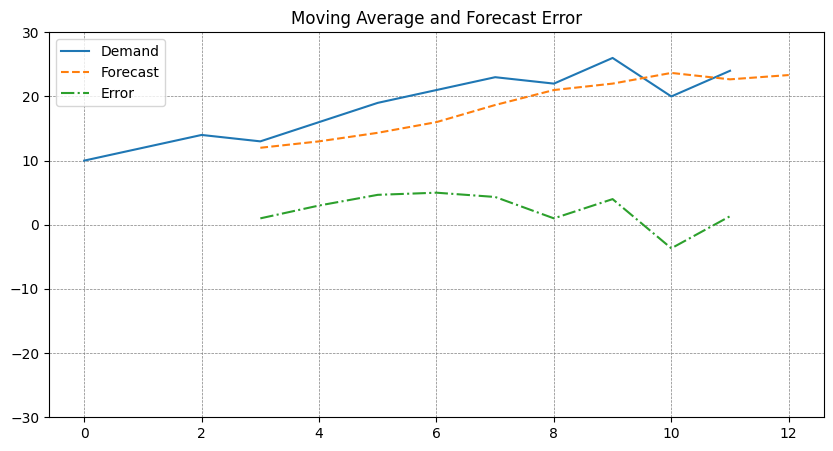

In [24]:
demand = np.array([10, 12, 14, 13, 16, 19, 21, 23, 22, 26, 20, 24])
df = moving_average(demand, extra_periods=4, n=3)

# Plot the forecast and the error
ax = df[['Demand', 'Forecast', 'Error']].plot(figsize = (10, 5), title = 'Moving Average and Forecast Error', ylim = (-30,30), style = ['-', '--', '-.'])

# Add a customized grid
ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5)

plt.show()

### Bias
The bias is the average of the errors. The formula is:
$$Bias = \frac{1}{T} \sum_{t=1}^{T} e_t$$

Where,  
 - $Bias$ is the bias
 - $T$ is the number of periods
 - $e_t$ is the forecast error for period t

The bias alone won’t be enough to evaluate your forecast accuracy. Because a positive error in one period can offset a negative error in another period, a forecast model can achieve very low bias and not be accurate at the same time. Nevertheless, a highly biased forecast is already an indication that something is wrong in the model.


#### Scaling the bias
The bias computed as in the formula above will give you an absolute value like 43 or −1400. As a demand planner investigating your product forecasts, you should ask yourself the following question: Is 43 a good bias? Without information about the product’s average demand, you cannot answer this question. Therefore, a more relevant KPI would be the _scaled_ bias (or _normalized_ bias). We can compute it by dividing the total error by the total demand (which is the same as dividing the average error by the average demand).

The formula is:
$$Bias \% = \frac{Bias}{\frac{1}{T} \sum_{t=1}^{T} d_t}$$

Where,  
 - $Bias \%$ is the scaled bias
 - $Bias$ is the bias
 - $T$ is the number of periods
 - $d_t$ is the demand for period t

In [25]:
def kpi(df):
    T = len(df)
    demand_ave = df.loc[df.Error.notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / demand_ave
    
    return bias_abs, bias_rel

bias_abs, bias_rel = kpi(df)
print(f"Bias Absolute: {bias_abs:.2f}, Bias Relative: {bias_rel:.2%}")

Bias Absolute: 2.30, Bias Relative: 11.23%


### MAPE
The __Mean Absolute Percentage Error__ (or MAPE) is one of the most commonly used KPIs to measure forecast accuracy. MAPE is computed as the average of the __individual__ absolute errors divided by the demand (each period is divided separately). To put it simply, it is the average of the percentage absolute errors.

The formula is:
$$MAPE = \frac{1}{T} \sum_{t=1}^{T} \left| \frac{e_t}{d_t} \right|$$

Where,  
 - $MAPE$ is the mean absolute percentage error
 - $T$ is the number of periods
 - $e_t$ is the forecast error for period t
 - $d_t$ is the demand for period t

MAPE is a strange forecast KPI. It is quite well-known among business managers, despite being a really poor accuracy indicator. As you can see in the formula, MAPE divides each error individually by the demand, so it is skewed: high errors during low-demand periods will have a major impact on MAPE. You can see this from another point of view: if you choose MAPE as an error KPI, an extremely low forecast (such as 0) can only result in a maximum error of 100%, whereas any too-high forecast will not be capped to a specific percentage error. Due to this, optimizing MAPE will result in a strange forecast that will most likely undershoot the demand. Just avoid it.



In [26]:
def mape(df):
    T = len(df)
    mape = (df['Error'].abs() / df['Demand']).mean()
    return mape 

print(f"MAPE: {mape(df):.2%}")


MAPE: 15.27%


### MAE
The __Mean Absolute Error__ (or MAE) is the average of the absolute errors. The formula is:
$$MAE = \frac{1}{T} \sum_{t=1}^{T} \left| e_t \right|$$

Where,  
 - $MAE$ is the mean absolute error
 - $T$ is the number of periods
 - $e_t$ is the forecast error for period t

MAE is a good KPI to measure the forecast accuracy. It is easy to interpret and is not skewed by the demand level. As for the bias, the MAE is an absolute number. If you are told that MAE is 10 for a particular item, you cannot know if this is good or bad. If your average demand is 1,000, it is, of course, astonishing, but if the average demand is 1, an MAE of 10 is a very poor accuracy. To solve this, it is common to divide MAE by the average demand to get a scaled percentage:

$$MAE \% = \frac{MAE}{\frac{1}{T} \sum_{t=1}^{T} d_t}$$

Where,  
 - $MAE \%$ is the scaled mean absolute error
 - $MAE$ is the mean absolute error
 - $T$ is the number of periods
 - $d_t$ is the demand for period t

 

In [27]:
def mae(df):
    demand_avg = df.loc[df.Error.notnull(), 'Demand'].mean()
    mae_abs = df['Error'].abs().mean()
    mae_rel = mae_abs / demand_avg
    return mae_abs, mae_rel

print(f"MAE Absolute: {mae(df)[0]:.2f}, MAE Relative: {mae(df)[1]:.2%}")



MAE Absolute: 3.11, MAE Relative: 15.22%


### RMSE
The __Root Mean Squared Error__ (or RMSE) is the square root of the average of the squared errors. The formula is:
$$RMSE = \sqrt{\frac{1}{T} \sum_{t=1}^{T} e_t^2}$$

Where,  
 - $RMSE$ is the root mean squared error
 - $T$ is the number of periods
 - $e_t$ is the forecast error for period t

RMSE is a good KPI to measure the forecast accuracy. It is easy to interpret and is not skewed by the demand level. As for the bias, the RMSE is an absolute number. 

Just as for MAE, RMSE is not scaled to the demand, so it needs to be put in percentages to be understandable. We can then define RMSE% as:
$$RMSE \% = \frac{RMSE}{\frac{1}{T} \sum_{t=1}^{T} d_t}$$

Where,  
 - $RMSE \%$ is the scaled root mean squared error
 - $RMSE$ is the root mean squared error
 - $T$ is the number of periods
 - $d_t$ is the demand for period t 
 
Actually, many algorithms—especially for machine learning—are based on the Mean Square Error (MSE), which is directly related to RMSE.
$$MSE = \frac{1}{T} \sum_{t=1}^{T} e_t^2$$

Many algorithms use MSE instead of RMSE since MSE is faster to compute and easier to manipulate. But it is not scaled to the original error (as the error is squared), resulting in a KPI that we cannot relate to the original demand scale. Therefore, we won’t use it to evaluate our statistical forecast models.


  

In [28]:
def rmse(df):
    rmse = np.sqrt((df['Error']**2).mean())
    demand_avg = df.loc[df.Error.notnull(), 'Demand'].mean()
    rmse_rel = rmse / demand_avg
    return rmse, rmse_rel

print(f"RMSE Absolute: {rmse(df)[0]:.2f}, RMSE Relative: {rmse(df)[1]:.2%}")


RMSE Absolute: 3.46, RMSE Relative: 16.93%


### A Question of Error Weighting 
Compared to __MAE__, __RMSE__ does not treat each error the same. It gives more importance to the biggest errors. That means that one big error is enough to get a very bad RMSE. Let’s use an example with a dummy demand time series.

|------|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Period| 1| 2| 3| 4| 5| 6| 7| 8| 9| 10| 11| 12|
|Demand| 10| 12| 14| 8| 9| 5| 8| 10| 12| 11| 10| 15|


